<a href="https://colab.research.google.com/github/manvij1612/minor-project---digit-recognisation/blob/master/mnistmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


11493376/11490434 [==============================] - 0s 0us/step


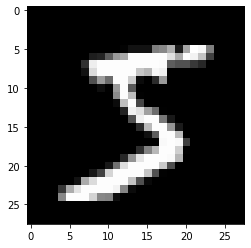

5
Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [ ]:
d=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= d.load_data()


plt.imshow(x_train[0], cmap="gray")
plt.show()
print (y_train[0])

print ("Shape of X_train: {}".format(x_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(x_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [ ]:
print ("Shape of X_train: {}".format(x_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(x_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))


Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000, 10, 2)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000, 10, 2)


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


In [ ]:
model = tf.keras.models.Sequential()


## Add the layers to the model
model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
test_loss,test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10


ValueError: ignored

In [ ]:
y_pred = model.predict_classes(x_test)
y_pred


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
np.argmax(y_pred[0])

0

In [ ]:
np.argmax(model.predict(x_test), axis=-1)


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
model.save('minor_project.h5')